In [66]:
import pandas as pd
import numpy as np
import pandas_ta as ta
import matplotlib.pyplot as plt
from trades_from_signal import get_trades_from_signal

coin_1 = "BTC"
coin_2 = "XRP"

coin_1_data = pd.read_csv(f'{coin_1}USDT3600.csv')
coin_1_data['date'] = coin_1_data['date'].astype('datetime64[s]')
coin_1_data = coin_1_data.set_index('date')
coin_1_data = coin_1_data.dropna()
coin_1_data = coin_1_data[:"2023-12-31"]

coin_2_data = pd.read_csv(f'{coin_2}USDT3600.csv')
coin_2_data['date'] = coin_2_data['date'].astype('datetime64[s]')
coin_2_data = coin_2_data.set_index('date')
coin_2_data = coin_2_data.dropna()
coin_2_data = coin_2_data[:"2023-12-31"]

for col in coin_1_data.columns:
    coin_1_data = coin_1_data.rename(columns={col: col.lower()})

for col in coin_2_data.columns:
    coin_2_data = coin_2_data.rename(columns={col: col.lower()})

start_date = max(coin_1_data.index.min(), coin_2_data.index.min())

coin_1_data = coin_1_data.loc[coin_1_data.index >= start_date]
coin_2_data = coin_2_data.loc[coin_2_data.index >= start_date]

In [67]:
coin_2_data.head()

,high,low,close,volume,number of trades
date,,,,,
2019-01-01 00:00:00,0.35034,0.34703,0.34917,1224145.0,1687.0
2019-01-01 01:00:00,0.34948,0.34717,0.34808,742235.8,1368.0
2019-01-01 02:00:00,0.34830,0.34533,0.34640,1373042.2,1680.0
2019-01-01 03:00:00,0.34931,0.34617,0.34874,1190583.3,1501.0
2019-01-01 04:00:00,0.35368,0.34858,0.35053,2327196.4,2403.0


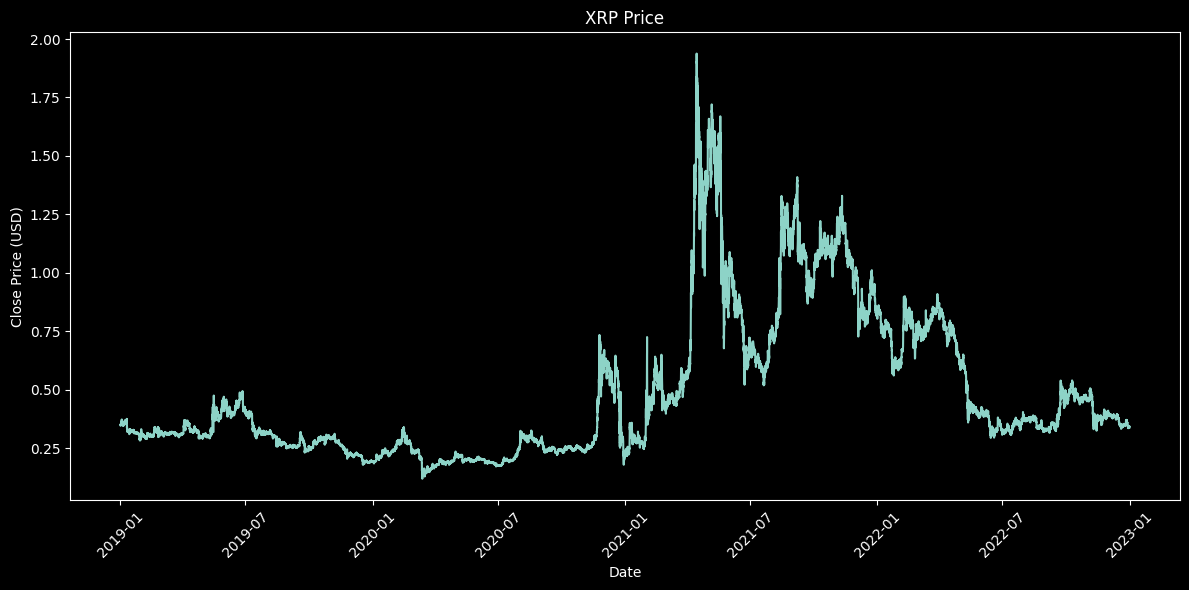

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(coin_2_data.index, coin_2_data["close"])
plt.title(f'{coin_2} Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

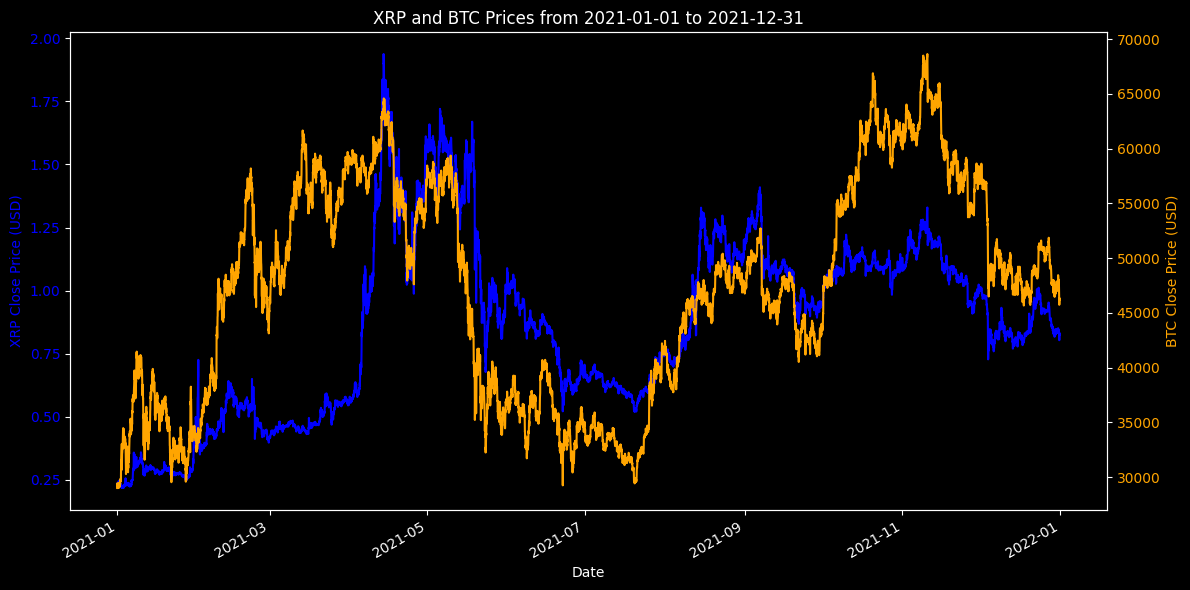

In [69]:
start_date = '2021-01-01'
end_date = '2021-12-31'

coin_2_filtered = coin_2_data[start_date:end_date]
coin_1_filtered = coin_1_data[start_date:end_date]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot coin_2 on the left y-axis
ax1.plot(coin_2_filtered.index, coin_2_filtered["close"], color='blue', label=f'{coin_2}')
ax1.set_xlabel('Date')
ax1.set_ylabel(f'{coin_2} Close Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for coin_1
ax2 = ax1.twinx()
ax2.plot(coin_1_filtered.index, coin_1_filtered["close"], color='orange', label=f'{coin_1}')
ax2.set_ylabel(f'{coin_1} Close Price (USD)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title(f'{coin_2} and {coin_1} Prices from {start_date} to {end_date}')
fig.autofmt_xdate()
plt.tight_layout()
plt.show()


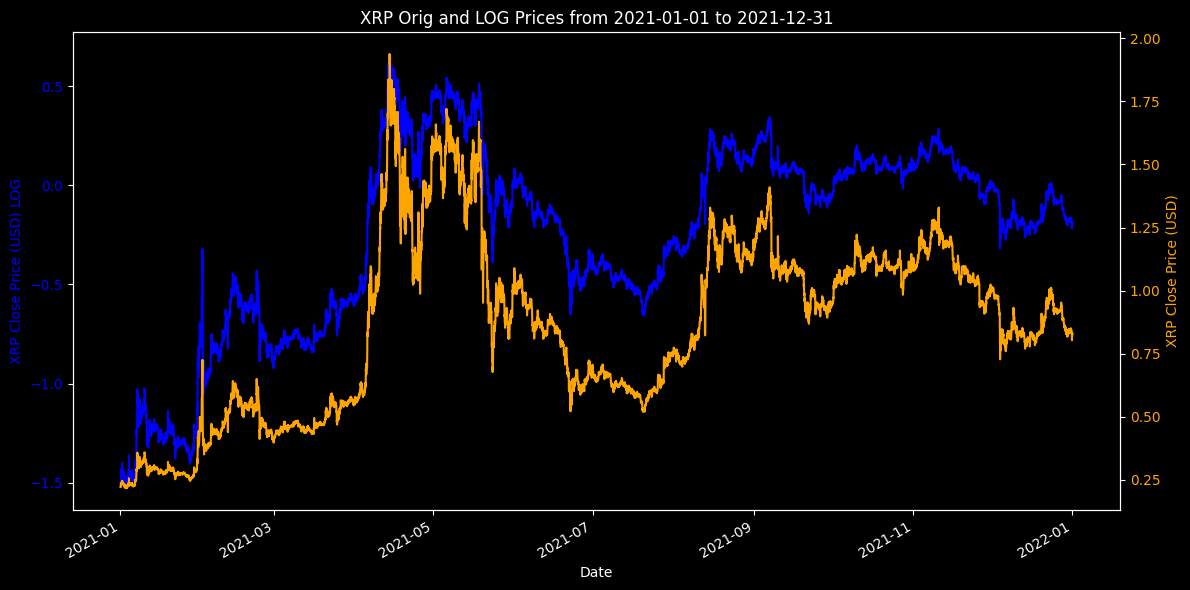

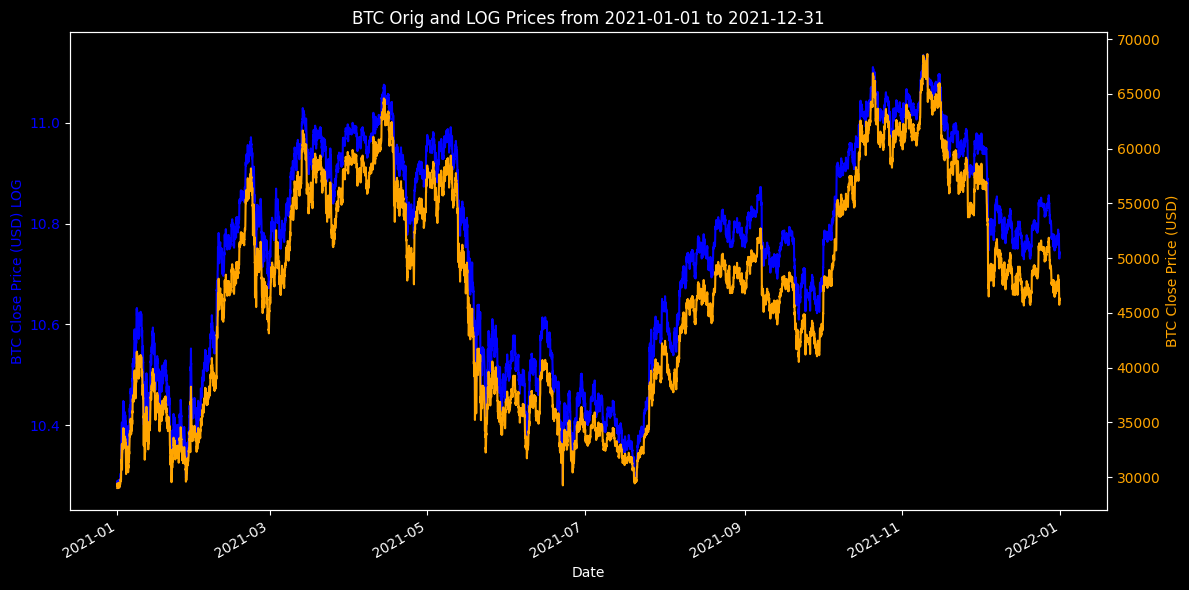

In [70]:
coin_2_data["close_log"] = np.log(coin_2_data["close"])
coin_1_data["close_log"] = np.log(coin_1_data["close"])

coin_2_filtered = coin_2_data[start_date:end_date]
coin_1_filtered = coin_1_data[start_date:end_date]

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(coin_2_filtered.index, coin_2_filtered["close_log"], color='blue', label=f"{coin_2}_log")
ax1.set_xlabel('Date')
ax1.set_ylabel(f'{coin_2} Close Price (USD) LOG', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(coin_2_filtered.index, coin_2_filtered["close"], color='orange', label=f"{coin_2}")
ax2.set_ylabel(f'{coin_2} Close Price (USD)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title(f'{coin_2} Orig and LOG Prices from {start_date} to {end_date}')
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(coin_1_filtered.index, coin_1_filtered["close_log"], color='blue', label=f"{coin_1}_log")
ax1.set_xlabel('Date')
ax1.set_ylabel(f'{coin_1} Close Price (USD) LOG', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(coin_1_filtered.index, coin_1_filtered["close"], color='orange', label=f"{coin_1}")
ax2.set_ylabel(f'{coin_1} Close Price (USD)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title(f'{coin_1} Orig and LOG Prices from {start_date} to {end_date}')
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

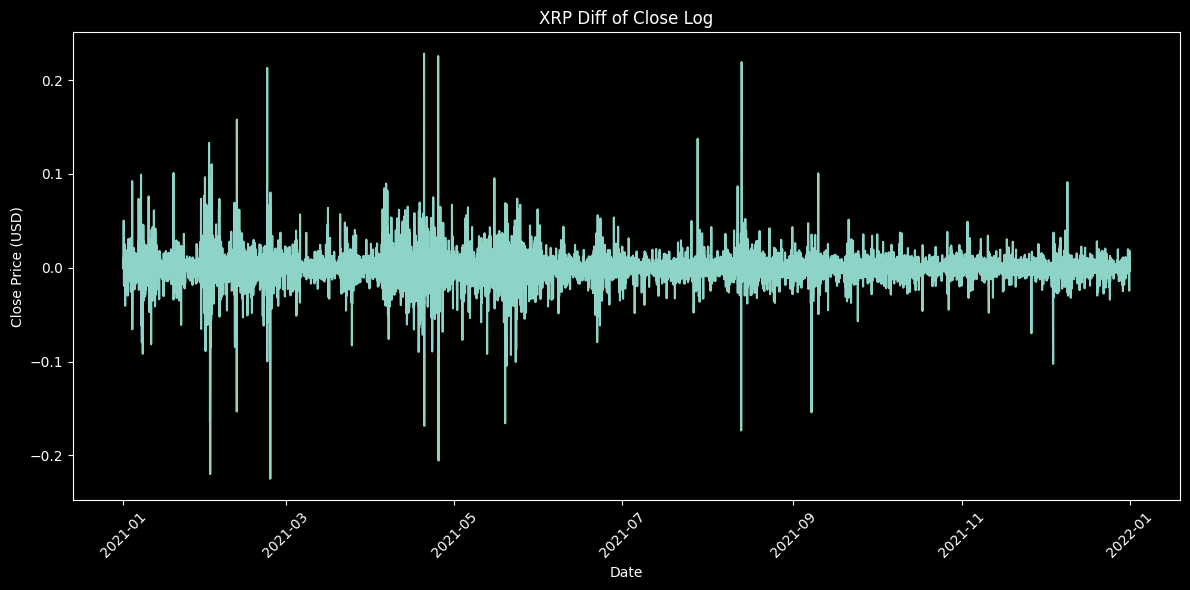

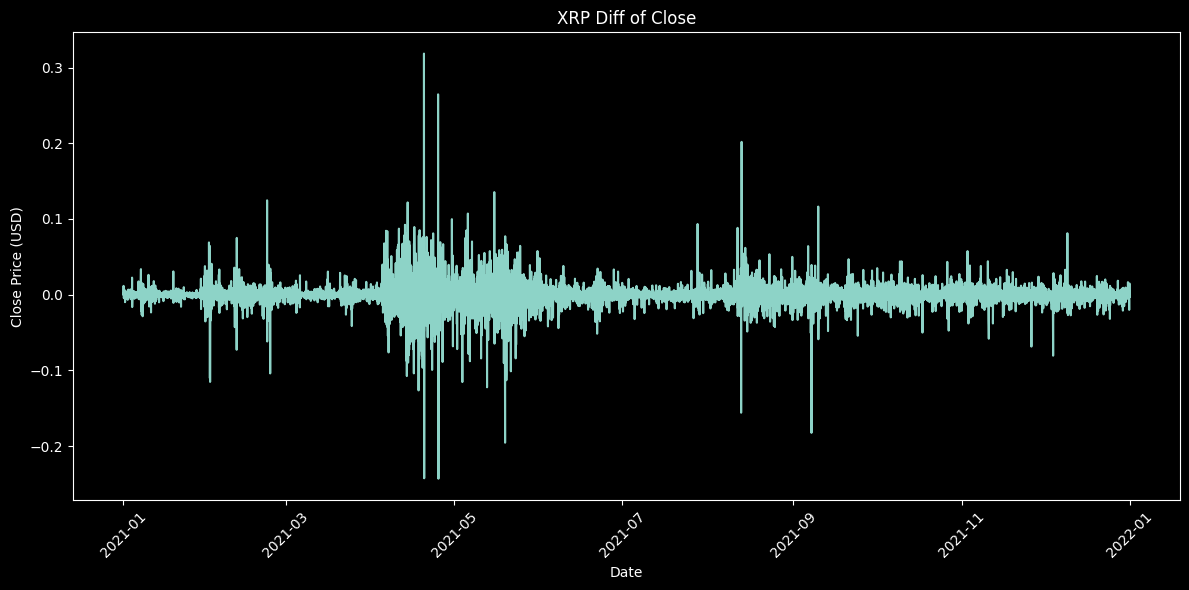

In [71]:
coin_2_data['diff'] = coin_2_data['close_log'].diff()
coin_1_data['diff'] = coin_1_data['close_log'].diff()

coin_2_filtered = coin_2_data[start_date:end_date]
plt.figure(figsize=(12, 6))
plt.plot(coin_2_filtered.index, coin_2_filtered["diff"])
plt.title(f'{coin_2} Diff of Close Log')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(coin_2_filtered.index, coin_2_filtered["close"].diff())
plt.title(f'{coin_2} Diff of Close')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

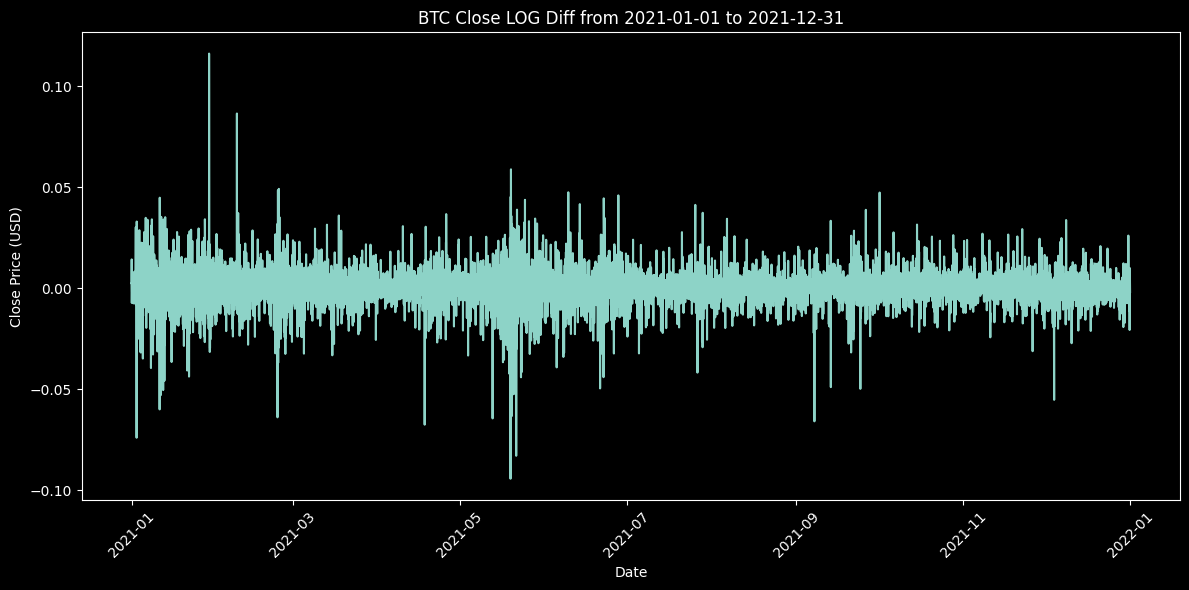

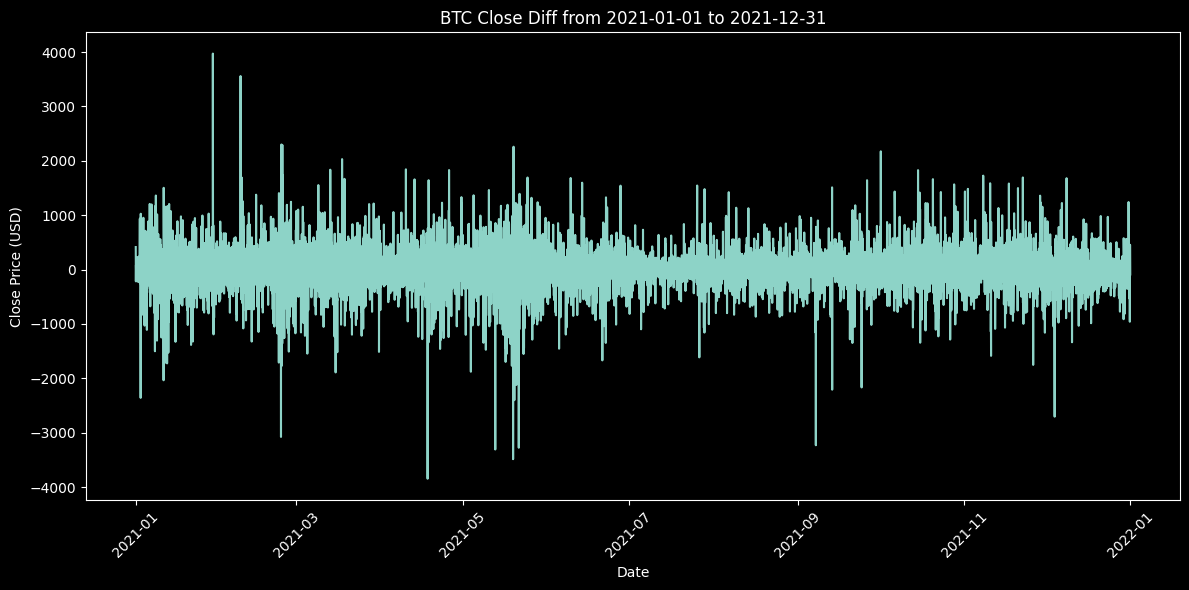

In [72]:
coin_1_filtered = coin_1_data[start_date:end_date]
plt.figure(figsize=(12, 6))
plt.plot(coin_1_filtered.index, coin_1_filtered["diff"])
plt.title(f'{coin_1} Close LOG Diff from {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(coin_1_filtered.index, coin_1_filtered["close"].diff())
plt.title(f'{coin_1} Close Diff from {start_date} to {end_date}')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

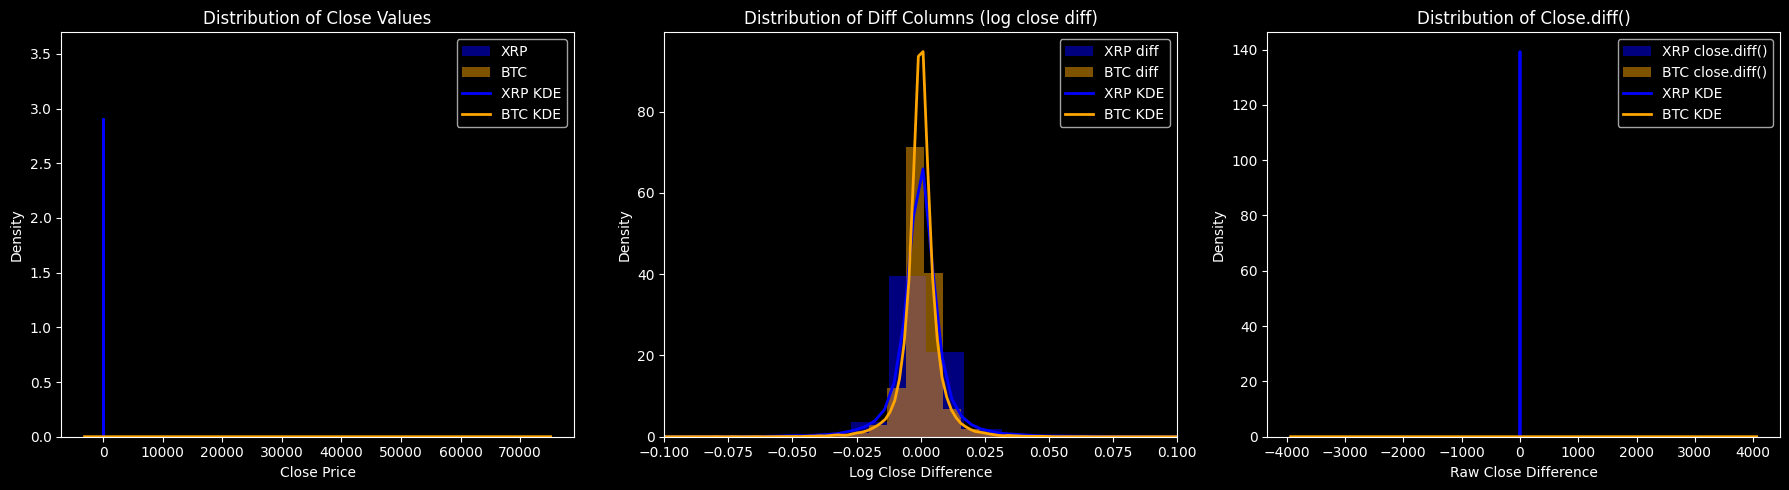

In [73]:
import seaborn as sns

# Create 3 overlayed distribution plots with KDE
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# First figure: Close values for coin_2 and coin_1
axes[0].hist(coin_2_data['close'], bins=50, alpha=0.5, label=coin_2, density=True, color='blue')
axes[0].hist(coin_1_data['close'], bins=50, alpha=0.5, label=coin_1, density=True, color='orange')
sns.kdeplot(coin_2_data['close'], ax=axes[0], color='blue', linewidth=2, label=f'{coin_2} KDE')
sns.kdeplot(coin_1_data['close'], ax=axes[0], color='orange', linewidth=2, label=f'{coin_1} KDE')
axes[0].set_title('Distribution of Close Values')
axes[0].set_xlabel('Close Price')
axes[0].set_ylabel('Density')
axes[0].legend()

# Second figure: diff columns (log close differences)
axes[1].hist(coin_2_data['diff'].dropna(), bins=50, alpha=0.5, label=f'{coin_2} diff', density=True, color='blue')
axes[1].hist(coin_1_data['diff'].dropna(), bins=50, alpha=0.5, label=f'{coin_1} diff', density=True, color='orange')
sns.kdeplot(coin_2_data['diff'].dropna(), ax=axes[1], color='blue', linewidth=2, label=f'{coin_2} KDE')
sns.kdeplot(coin_1_data['diff'].dropna(), ax=axes[1], color='orange', linewidth=2, label=f'{coin_1} KDE')
axes[1].set_title('Distribution of Diff Columns (log close diff)')
axes[1].set_xlabel('Log Close Difference')
axes[1].set_ylabel('Density')
axes[1].set_xlim([-0.1, 0.1])
axes[1].legend()

# Third figure: close.diff() (raw close differences)
axes[2].hist(coin_2_data['close'].diff().dropna(), bins=50, alpha=0.5, label=f'{coin_2} close.diff()', density=True, color='blue')
axes[2].hist(coin_1_data['close'].diff().dropna(), bins=50, alpha=0.5, label=f'{coin_1} close.diff()', density=True, color='orange')
sns.kdeplot(coin_2_data['close'].diff().dropna(), ax=axes[2], color='blue', linewidth=2, label=f'{coin_2} KDE')
sns.kdeplot(coin_1_data['close'].diff().dropna(), ax=axes[2], color='orange', linewidth=2, label=f'{coin_1} KDE')
axes[2].set_title('Distribution of Close.diff()')
axes[2].set_xlabel('Raw Close Difference')
axes[2].set_ylabel('Density')
axes[2].legend()

plt.tight_layout()
plt.show()

In [74]:
coin_2_data['next_return'] = coin_2_data['diff'].shift(-1)
coin_1_data['next_return'] = coin_1_data['diff'].shift(-1)

In [75]:
coin_2_data["diff"].iloc[:3], coin_2_data['next_return'].iloc[:3]

(date
 2019-01-01 00:00:00         NaN
 2019-01-01 01:00:00   -0.003127
 2019-01-01 02:00:00   -0.004838
 Name: diff, dtype: float64,
 date
 2019-01-01 00:00:00   -0.003127
 2019-01-01 01:00:00   -0.004838
 2019-01-01 02:00:00    0.006732
 Name: next_return, dtype: float64)

In [76]:
coin_2_data["close_log"].iloc[1:4].reset_index() - coin_2_data["close_log"].iloc[:3].reset_index()

,date,close_log
0,0 days 01:00:00,-0.003127
1,0 days 01:00:00,-0.004838
2,0 days 01:00:00,0.006732


In [77]:
coin_2_data["close_log"].iloc[0] + coin_2_data['next_return'].iloc[0], coin_2_data["close_log"].iloc[1]

(-1.0553229405697124, -1.0553229405697124)

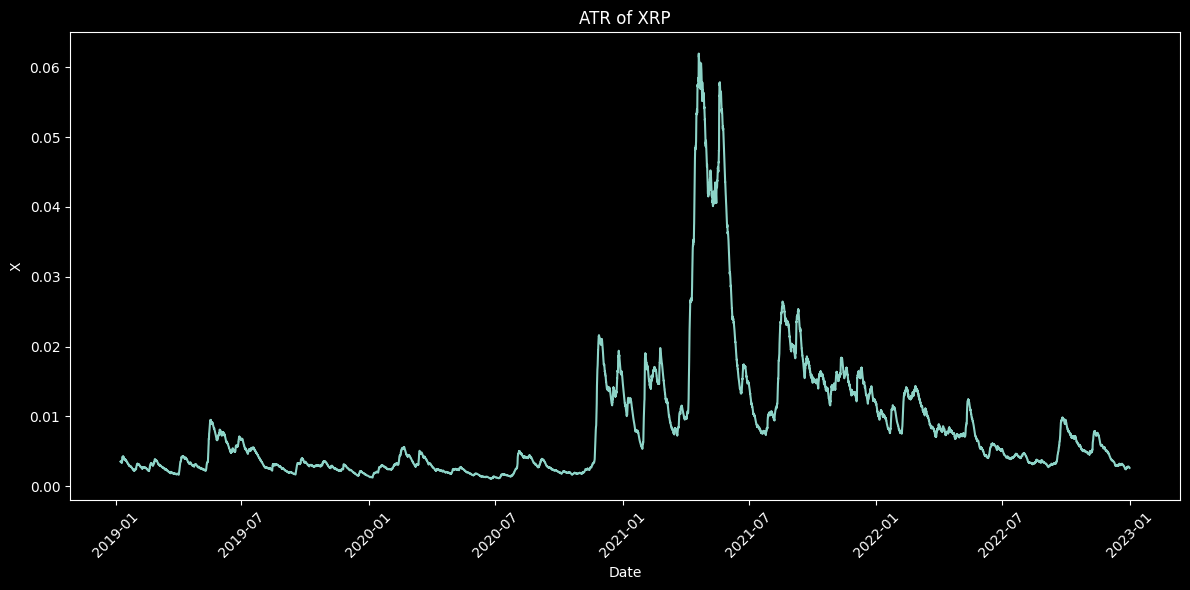

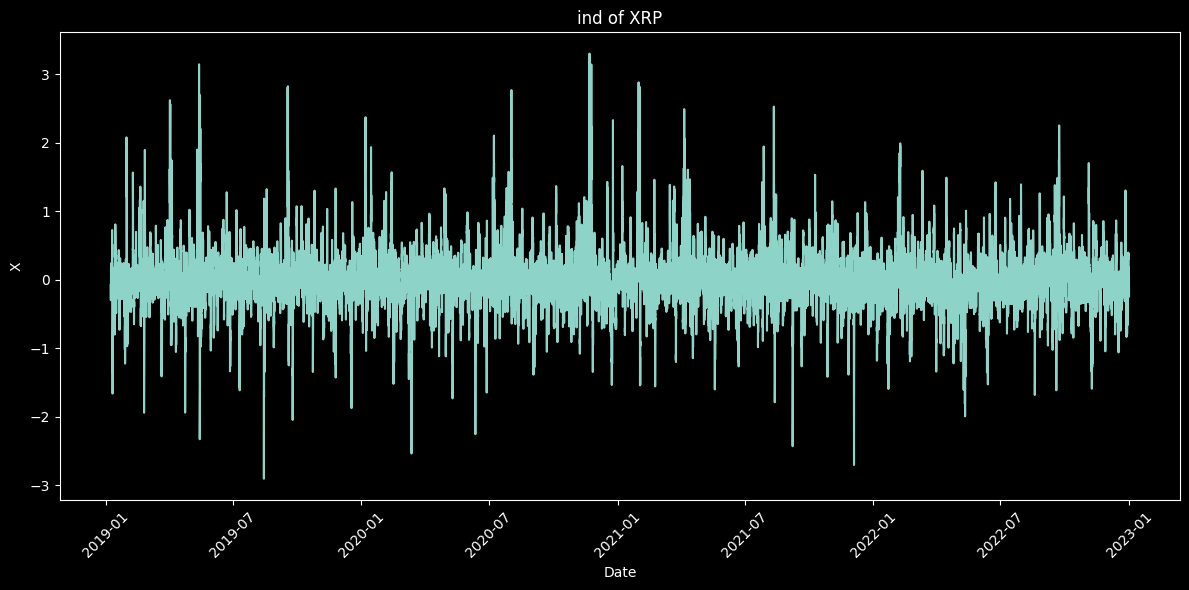

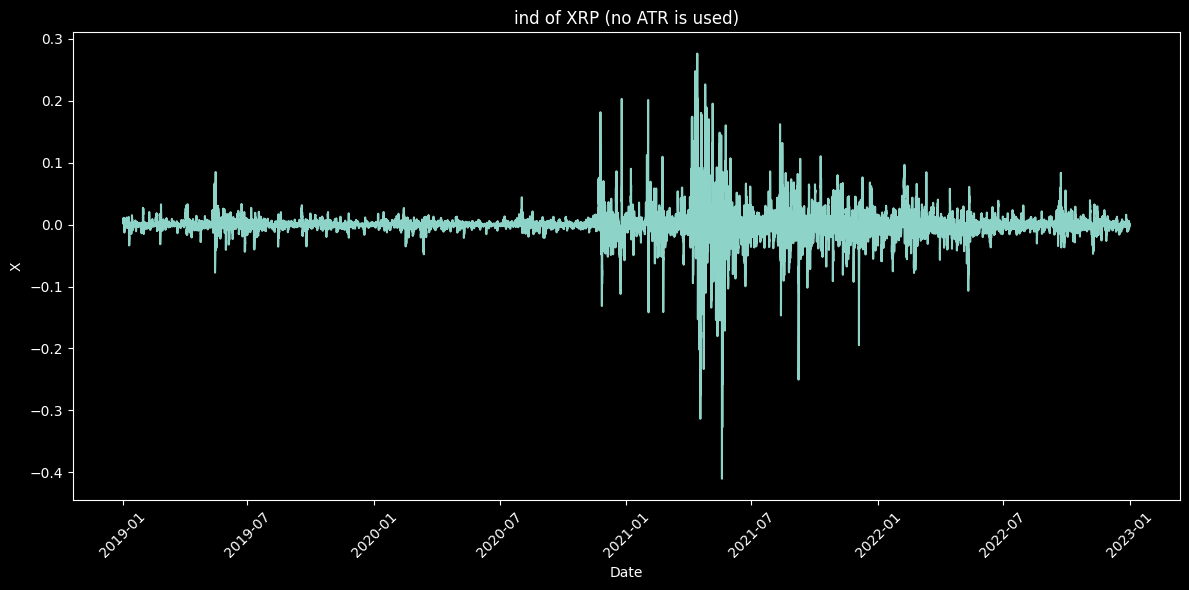

In [ ]:
lookback = 24
threshold = 0.25
atr_lookback = 168

atr = ta.atr(coin_2_data['high'], coin_2_data['low'], coin_2_data['close'], atr_lookback)
ma = coin_2_data['close'].rolling(lookback).mean()
ind = (coin_2_data['close'] - ma) / (atr * lookback ** 0.5)

plt.figure(figsize=(12, 6))
plt.plot(atr)
plt.title(f'ATR of {coin_2}')
plt.xlabel('Date')
plt.ylabel('X')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(ind)
plt.title(f'ind of {coin_2}')
plt.xlabel('Date')
plt.ylabel('X')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot((coin_2_data['close'] - ma))
plt.title(f'ind of {coin_2} (no ATR is used)')
plt.xlabel('Date')
plt.ylabel('X')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [79]:
def cmma(ohlc: pd.DataFrame, lookback: int, atr_lookback: int = 168):
    # cmma = Close minus moving average
    atr = ta.atr(ohlc['high'], ohlc['low'], ohlc['close'], atr_lookback)
    ma = ohlc['close'].rolling(lookback).mean()
    ind = (ohlc['close'] - ma) / (atr * lookback ** 0.5)
    return ind

coin_1_data["cmma"] = cmma(coin_1_data, lookback, atr_lookback)
coin_2_data["cmma"] = cmma(coin_2_data, lookback, atr_lookback)

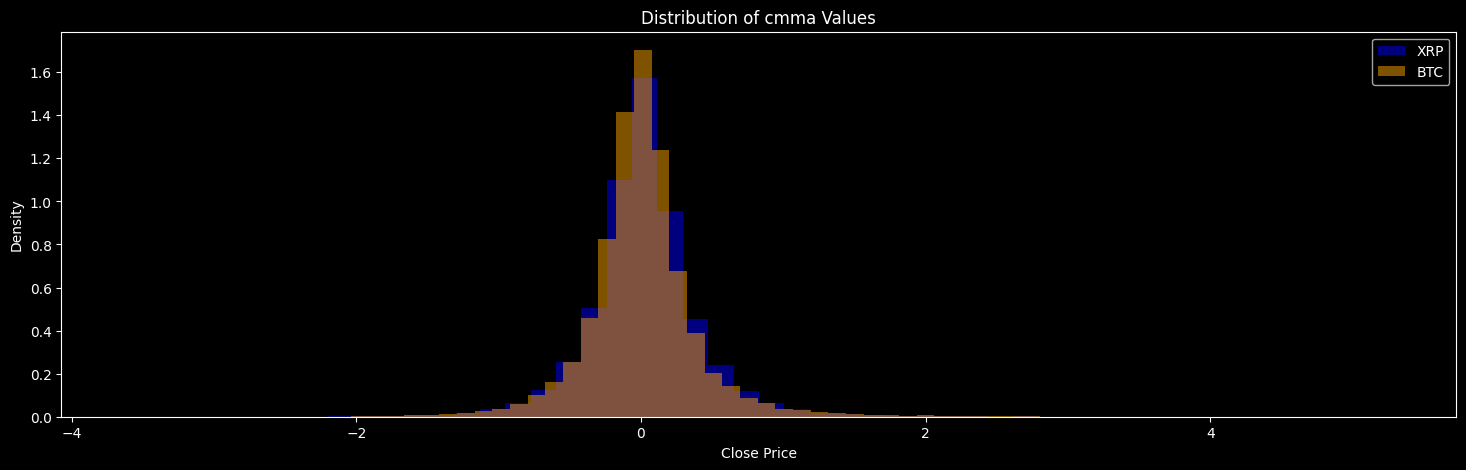

In [80]:
plt.figure(figsize=(18, 5))
plt.hist(coin_1_data["cmma"], bins=50, alpha=0.5, label=coin_2, density=True, color='blue')
plt.hist(coin_2_data["cmma"], bins=50, alpha=0.5, label=coin_1, density=True, color='orange')
sns.kdeplot(coin_1_data["cmma"], ax=axes[0], color='blue', linewidth=2, label=f'{coin_1} KDE')
sns.kdeplot(coin_2_data["cmma"], ax=axes[0], color='orange', linewidth=2, label=f'{coin_2} KDE')
plt.title('Distribution of cmma Values')
plt.xlabel('Close Price')
plt.ylabel('Density')
plt.legend()

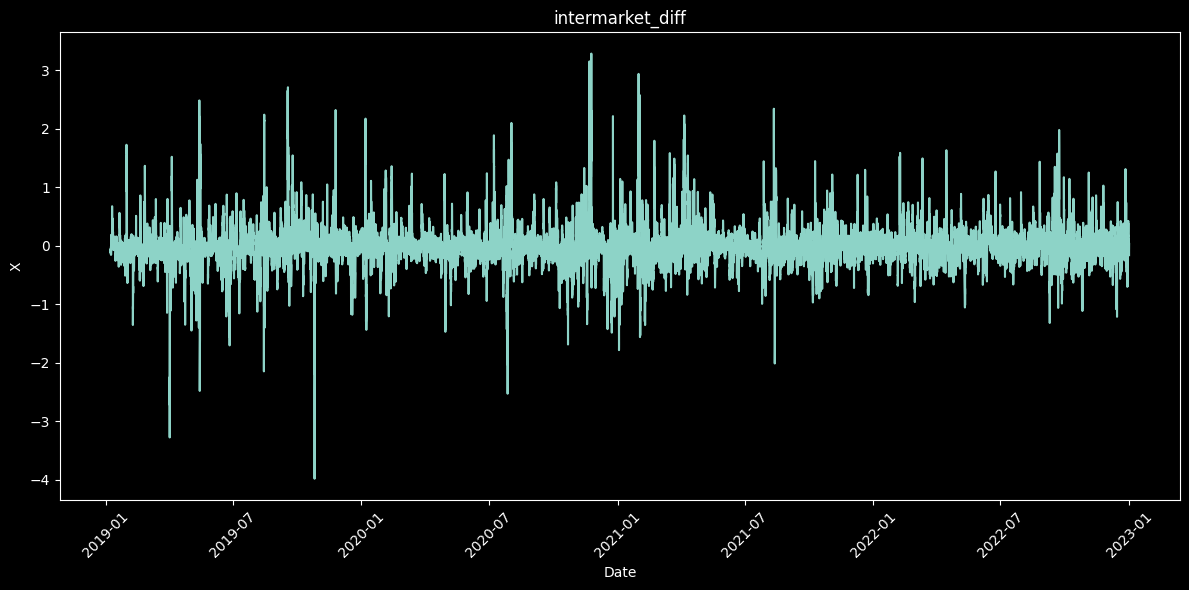

In [81]:
intermarket_diff = coin_2_data["cmma"] - coin_1_data["cmma"]

plt.figure(figsize=(12, 6))
plt.plot(intermarket_diff)
plt.title('intermarket_diff')
plt.xlabel('Date')
plt.ylabel('X')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [82]:
def threshold_revert_signal(ind: pd.Series, threshold: float):
    # Outputs a 1 or -1 signal once the indicator goes above threshold or below -threshold
    # Outputs 0 again once the indicator returns to 0

    signal = np.zeros(len(ind))
    position = 0
    for i in range(len(ind)):
        if ind[i] > threshold:
            position = 1
        if ind[i] < -threshold:
            position = -1

        if position == 1 and ind[i] <= 0:
            position = 0
        
        if position == -1 and ind[i] >= 0:
            position = 0

        signal[i] = position
    
    return signal

coin_2_data["sig"] = threshold_revert_signal(intermarket_diff, threshold)

/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

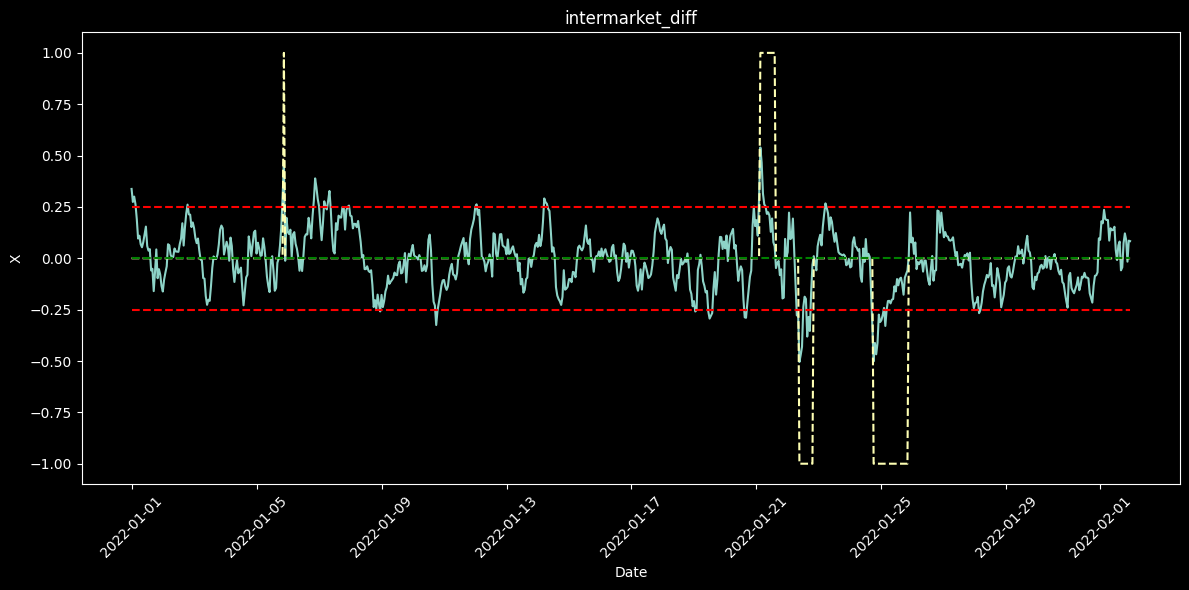

In [83]:
i = intermarket_diff["2022-01-01":"2022-02-01"]
sig_small = coin_2_data["2022-01-01":"2022-02-01"]["sig"]

plt.figure(figsize=(12, 6))
plt.plot(i)
plt.plot(sig_small, linestyle='dashed')
plt.hlines(0.25, xmin=i.index[0], xmax=i.index[-1], colors='red', linestyles='dashed')
plt.hlines(-0.25, xmin=i.index[0], xmax=i.index[-1], colors='red', linestyles='dashed')
plt.hlines(0, xmin=i.index[0], xmax=i.index[-1], colors='green', linestyles='dashed')
plt.title('intermarket_diff')
plt.xlabel('Date')
plt.ylabel('X')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

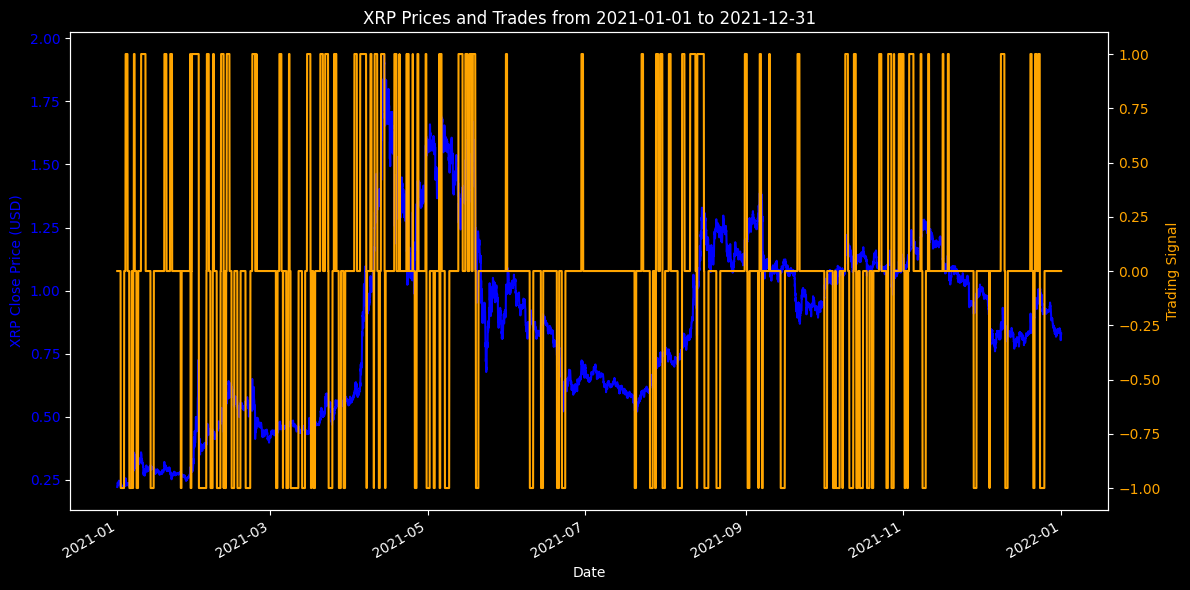

In [84]:
start_date = '2021-01-01'
end_date = '2021-12-31'

coin_2_filtered = coin_2_data[start_date:end_date]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot coin_2 on the left y-axis
ax1.plot(coin_2_filtered.index, coin_2_filtered["close"], color='blue', label=coin_2)
ax1.set_xlabel('Date')
ax1.set_ylabel(f'{coin_2} Close Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for coin_1
ax2 = ax1.twinx()
ax2.plot(coin_2_filtered.index, coin_2_filtered["sig"], color='orange', label='Trade')
ax2.set_ylabel('Trading Signal', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title(f'{coin_2} Prices and Trades from {start_date} to {end_date}')
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

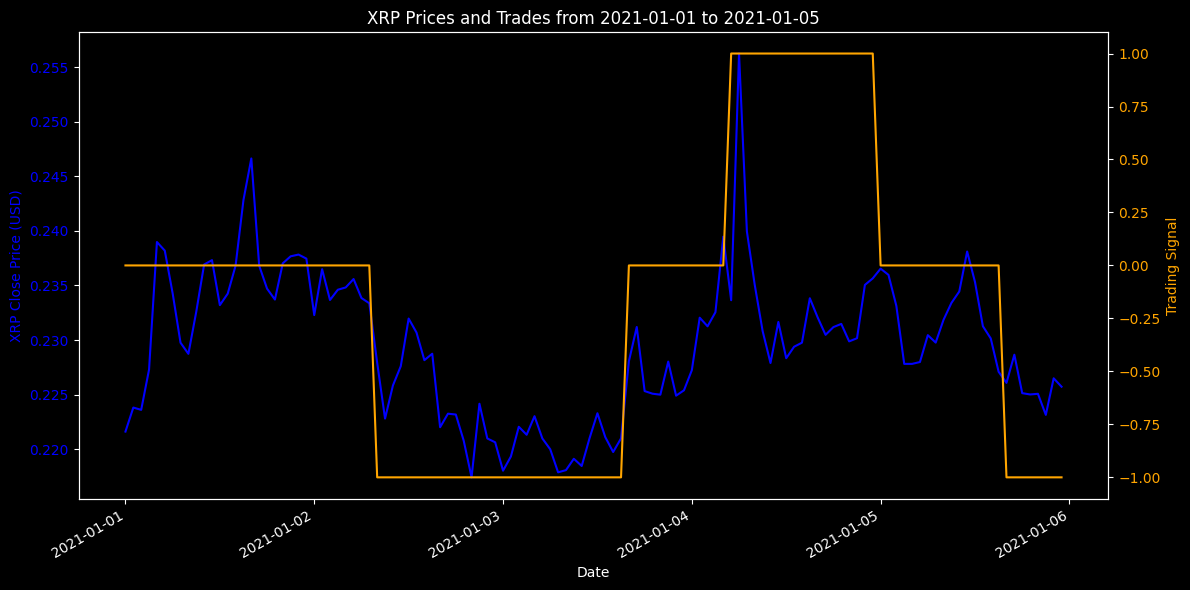

In [85]:
start_date = '2021-01-01'
end_date = '2021-01-05'

coin_2_filtered = coin_2_data[start_date:end_date]

fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot coin_2 on the left y-axis
ax1.plot(coin_2_filtered.index, coin_2_filtered["close"], color='blue', label=coin_2)
ax1.set_xlabel('Date')
ax1.set_ylabel(f'{coin_2} Close Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for coin_1
ax2 = ax1.twinx()
ax2.plot(coin_2_filtered.index, coin_2_filtered["sig"], color='orange', label='Trade')
ax2.set_ylabel('Trading Signal', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title(f'{coin_2} Prices and Trades from {start_date} to {end_date}')
fig.autofmt_xdate()
plt.tight_layout()
plt.show()


Profit factor 0.9576324247578825


/Users/nikitakrasnytskyi/Desktop/IntramarketDifference/trades_from_signal.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if signal[i] == 1.0 and last_sig != 1.0: # Long entry
/Users/nikitakrasnytskyi/Desktop/IntramarketDifference/trades_from_signal.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if signal[i] == -1.0  and last_sig != -1.0: # Short entry
/Users/nikitakrasnytskyi/Desktop/IntramarketDifference/trades_from_signal.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavio

long trades
# of trades 257
win rate 0.46303501945525294
avg trade % 0.29995139341530724

short trades
# of trades 263
win rate 0.4068441064638783
avg trade % -0.9906177866584839


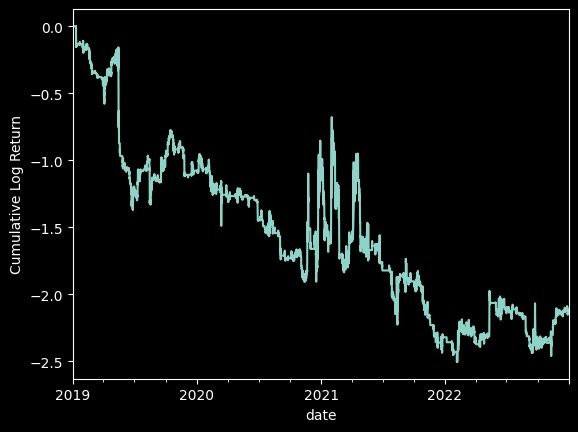

In [86]:
plt.style.use('dark_background')
rets = coin_2_data['sig'] * coin_2_data['next_return']
pf = rets[rets > 0].sum() / rets[rets<0].abs().sum()
print("Profit factor", pf)
rets.cumsum().plot()
plt.ylabel("Cumulative Log Return")

long_trades, short_trades, all_trades = get_trades_from_signal(coin_2_data, coin_2_data['sig'])

long_tr = long_trades['return']
short_tr = short_trades['return']

print("long trades")
print("# of trades", len(long_tr))
print("win rate", len(long_tr[long_tr > 0]) / len(long_tr) )
print("avg trade %", long_tr.mean() * 100)
print("") 
print("short trades")
print("# of trades", len(short_tr))
print("win rate", len(short_tr[short_tr > 0]) / len(short_tr) )
print("avg trade %", short_tr.mean() * 100)

/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

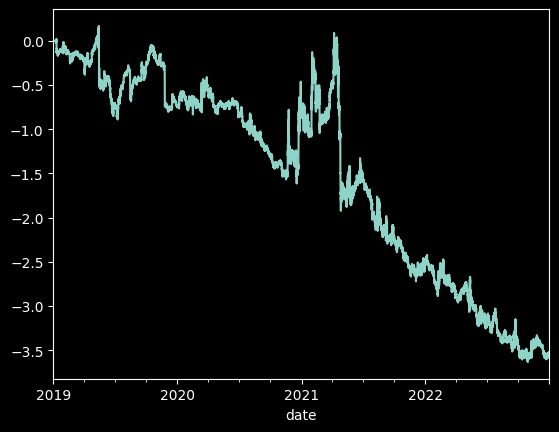

Threshold: 0.10, profit factor: 0.96


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

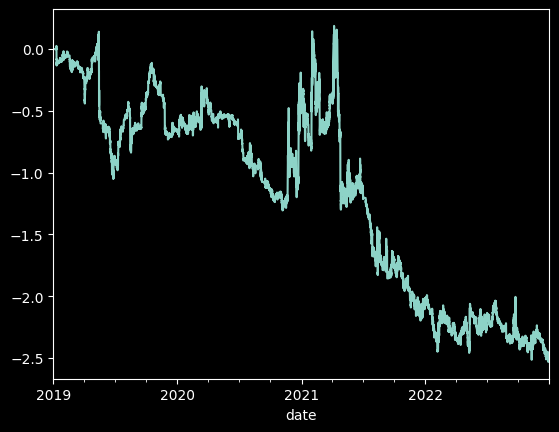

Threshold: 0.20, profit factor: 0.97


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

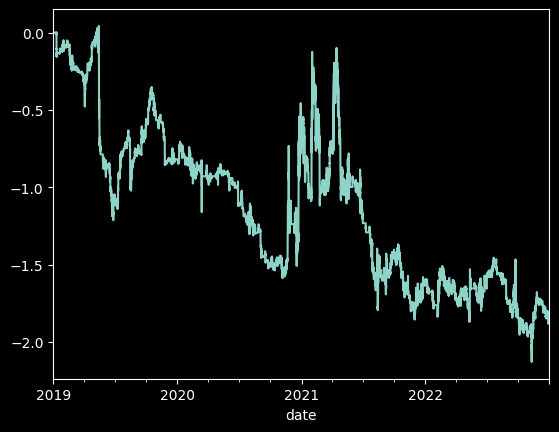

Threshold: 0.30, profit factor: 0.97


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

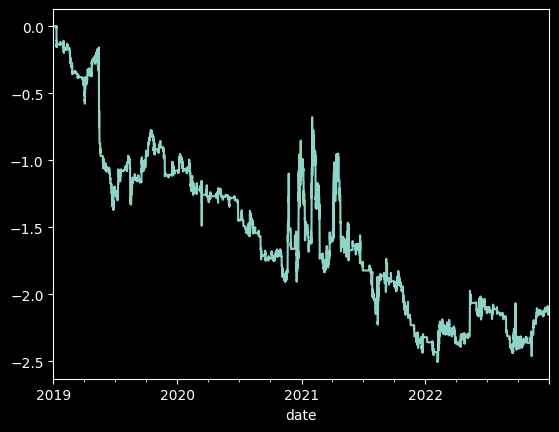

Threshold: 0.40, profit factor: 0.96


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

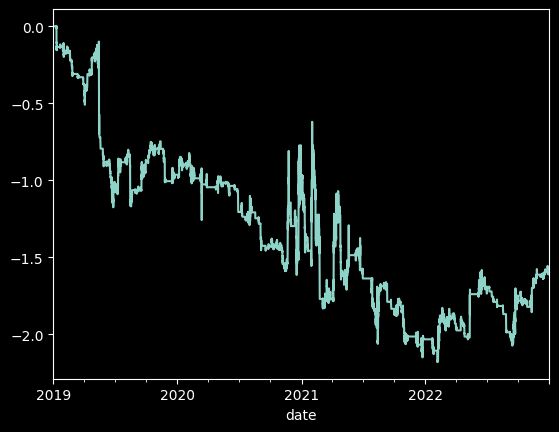

Threshold: 0.50, profit factor: 0.96


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

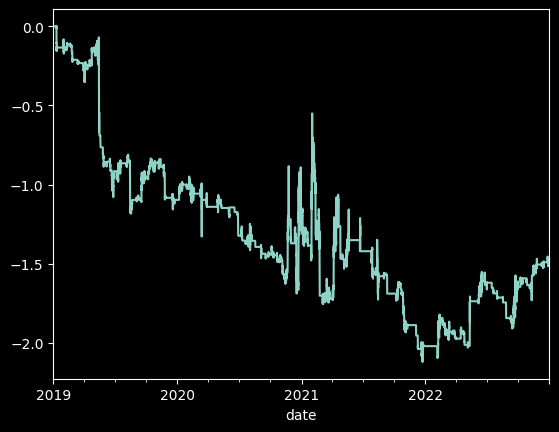

Threshold: 0.60, profit factor: 0.96


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

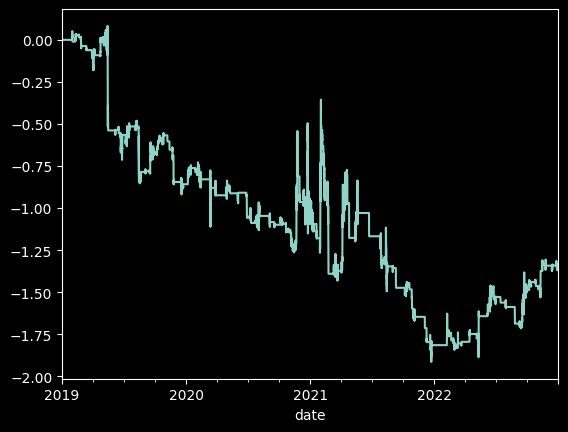

Threshold: 0.70, profit factor: 0.95


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

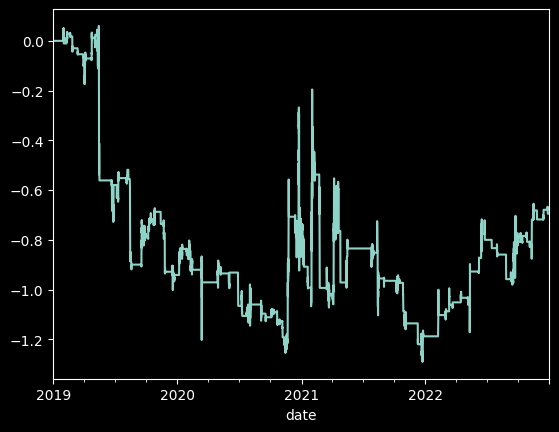

Threshold: 0.80, profit factor: 0.97


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

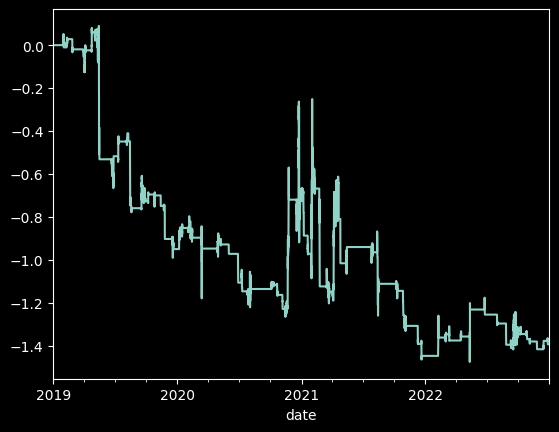

Threshold: 0.90, profit factor: 0.93


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

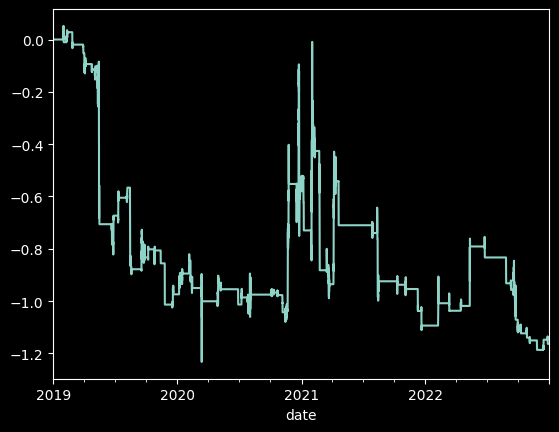

Threshold: 1.00, profit factor: 0.93


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

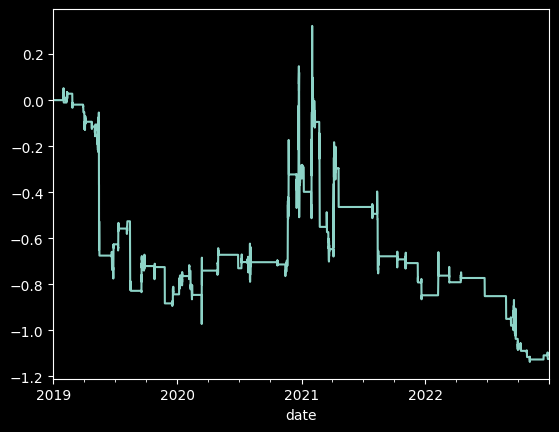

Threshold: 1.10, profit factor: 0.93


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

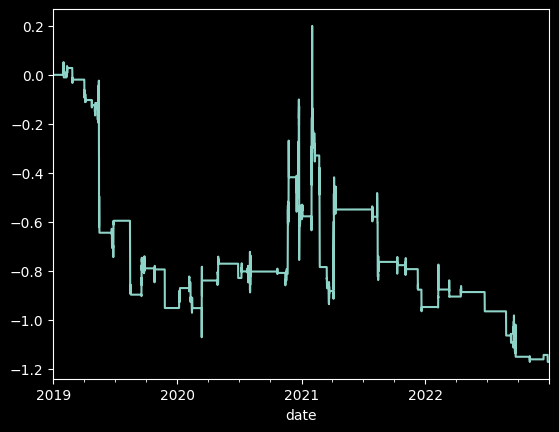

Threshold: 1.20, profit factor: 0.91


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

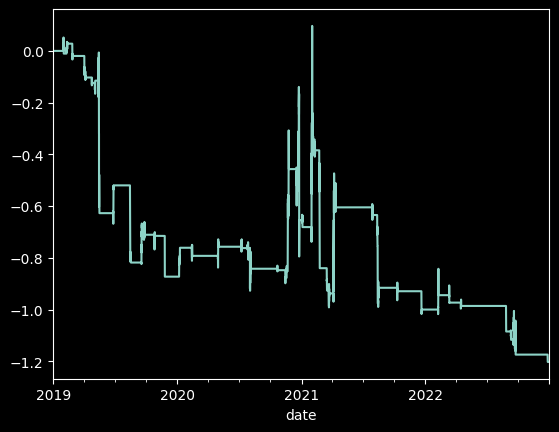

Threshold: 1.30, profit factor: 0.90


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

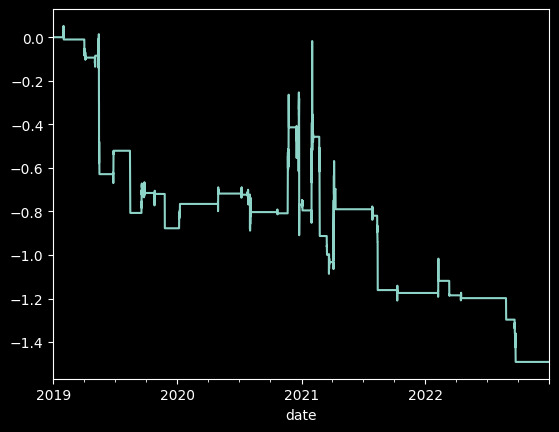

Threshold: 1.40, profit factor: 0.86


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

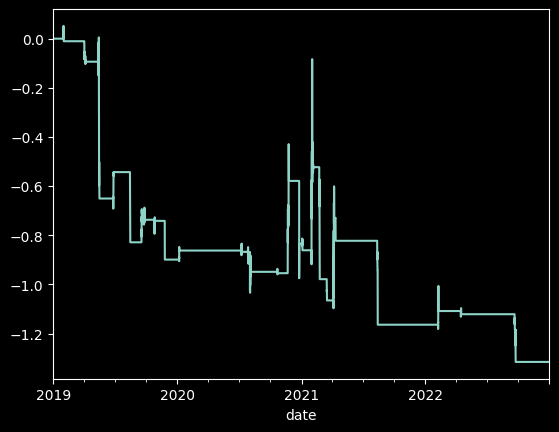

Threshold: 1.50, profit factor: 0.84


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

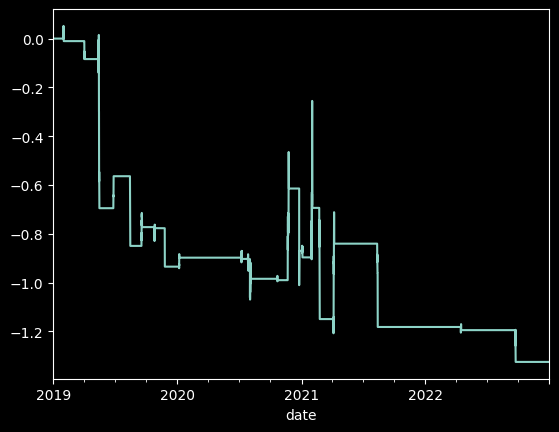

Threshold: 1.60, profit factor: 0.81


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

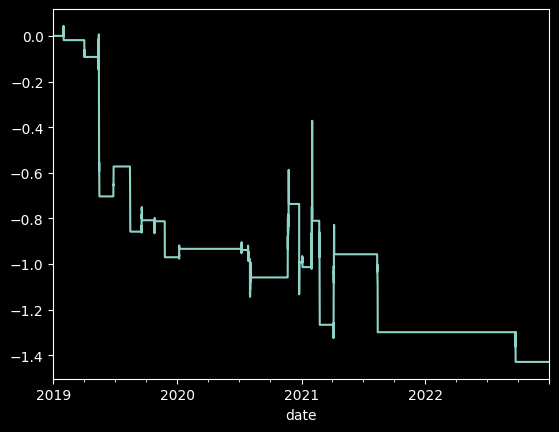

Threshold: 1.70, profit factor: 0.79


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

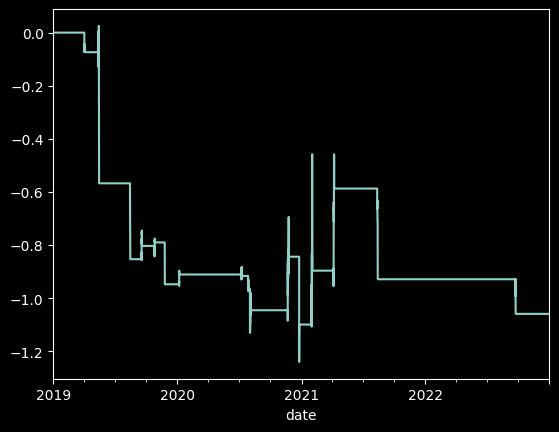

Threshold: 1.80, profit factor: 0.81


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

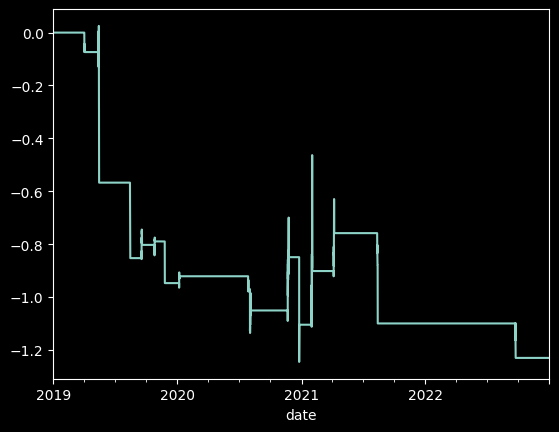

Threshold: 1.90, profit factor: 0.77


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

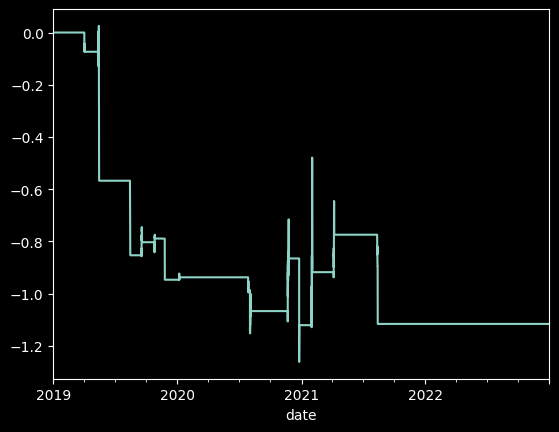

Threshold: 2.00, profit factor: 0.78


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

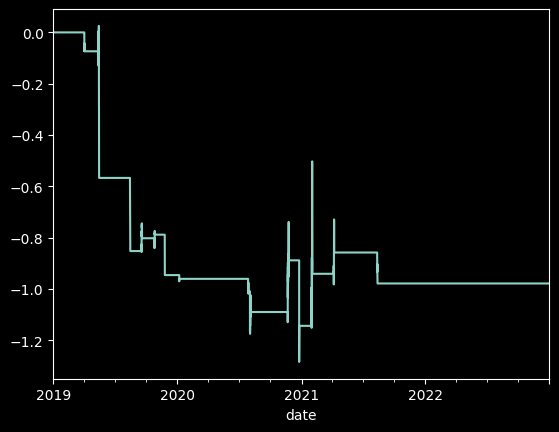

Threshold: 2.10, profit factor: 0.80


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

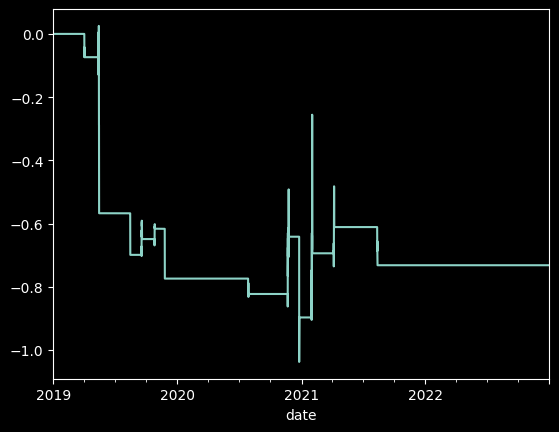

Threshold: 2.20, profit factor: 0.82


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

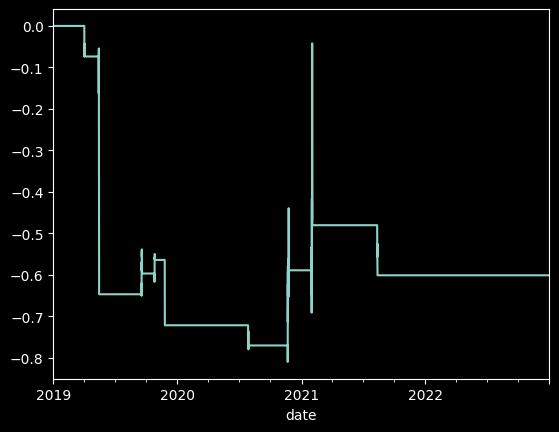

Threshold: 2.30, profit factor: 0.81


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

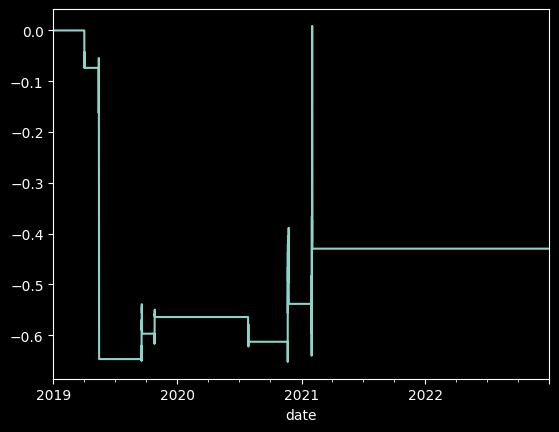

Threshold: 2.40, profit factor: 0.84


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

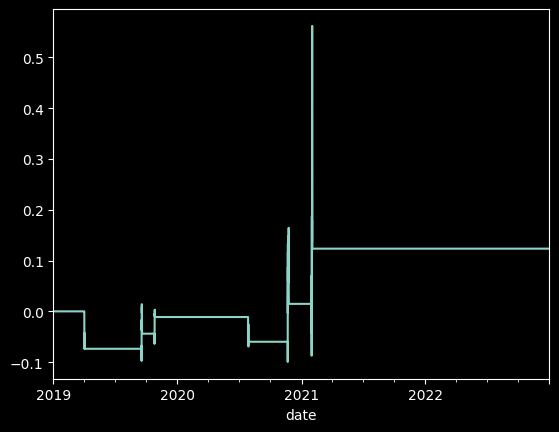

Threshold: 2.50, profit factor: 1.06


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

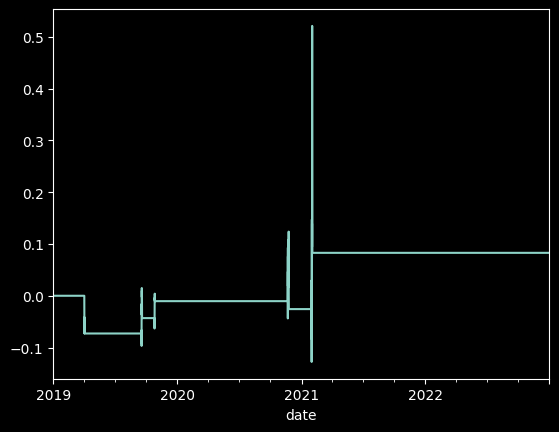

Threshold: 2.60, profit factor: 1.05


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

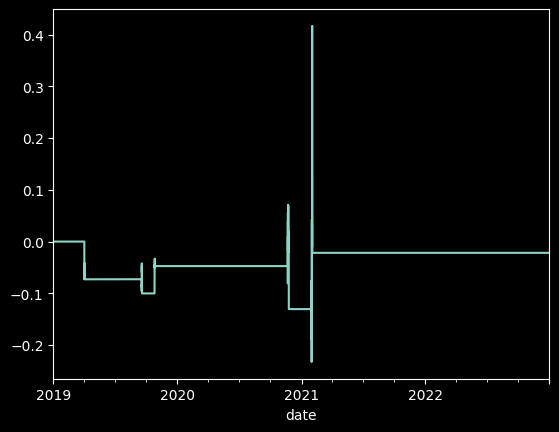

Threshold: 2.70, profit factor: 0.99


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

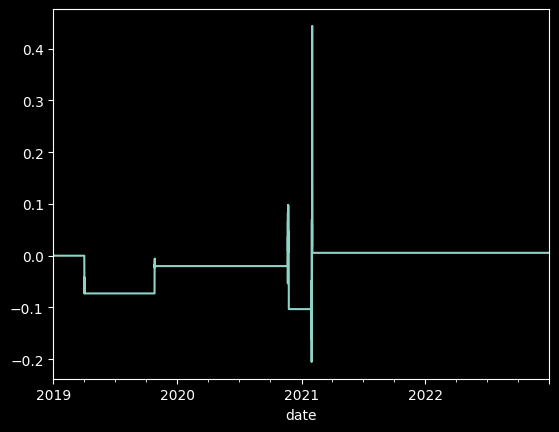

Threshold: 2.80, profit factor: 1.00


/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] > threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if ind[i] < -threshold:
/var/folders/y5/5krqq0yd3g9c48nbs52dkmhc0000gn/T/ipykernel_64943/1970600665.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if 

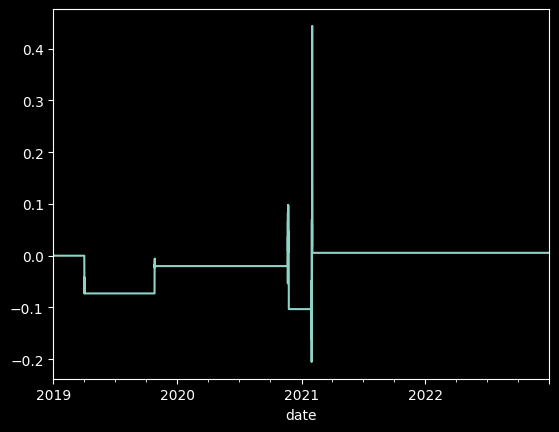

Threshold: 2.90, profit factor: 1.00


In [94]:
thresholds = np.arange(0.1, 3, 0.1)
for t in thresholds:
    coin_2_data["sig"] = threshold_revert_signal(intermarket_diff, t)
    rets = coin_2_data['sig'] * coin_2_data['next_return']
    pf = rets[rets > 0].sum() / rets[rets<0].abs().sum()
    rets.cumsum().plot()
    plt.show()
    print(f"Threshold: {t:.2f}, profit factor: {pf:.2f}")